<a href="https://colab.research.google.com/github/galdir/Data-Analysis-with-Python/blob/main/Tema_10_Web_Scrapping_Caps_1%2C_2_e_3_Mitchell_Web_Scrapping_with_pyhton_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Web Scraping

## O acesso a Web

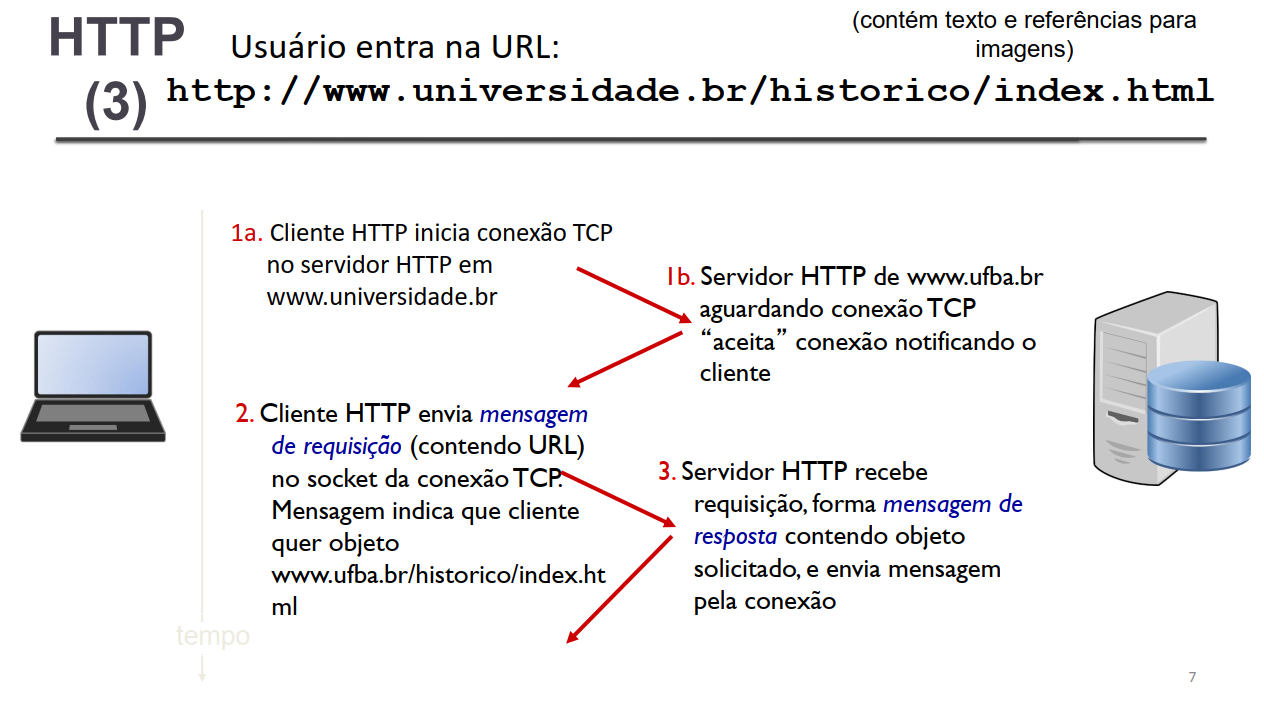

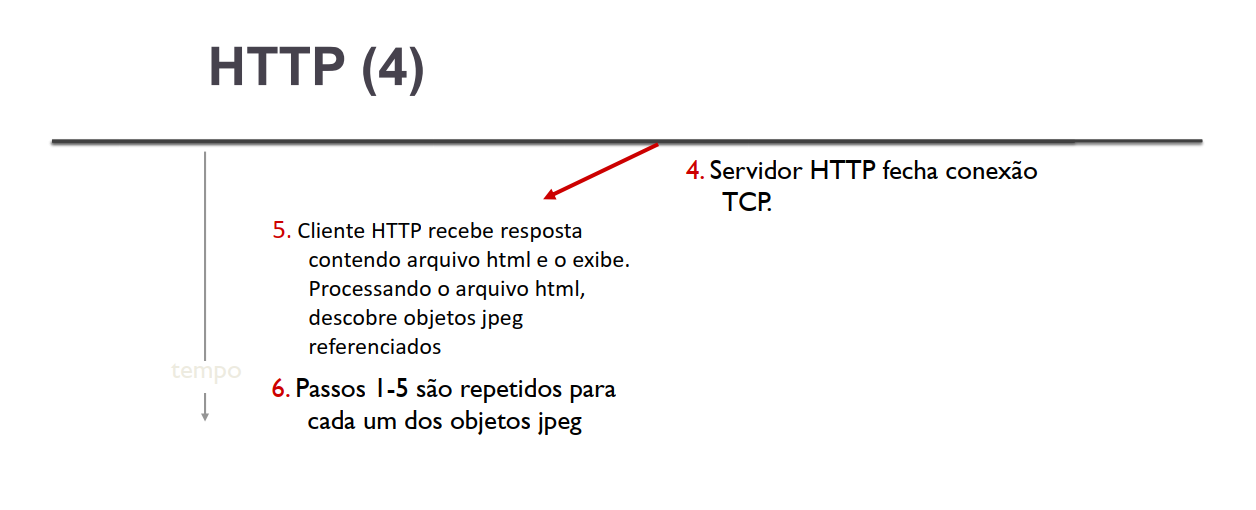

## A estrutura de uma página da Web

A página http://pythonscraping.com/pages/page1.html

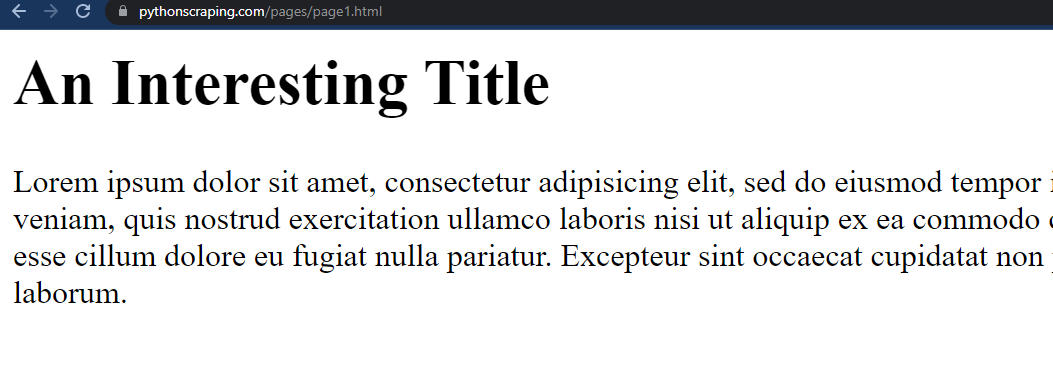

Podemos salvar a página clicando como arquivo.

Ao abrir o arquivo em um leitor de texto vamos ver estrutura html

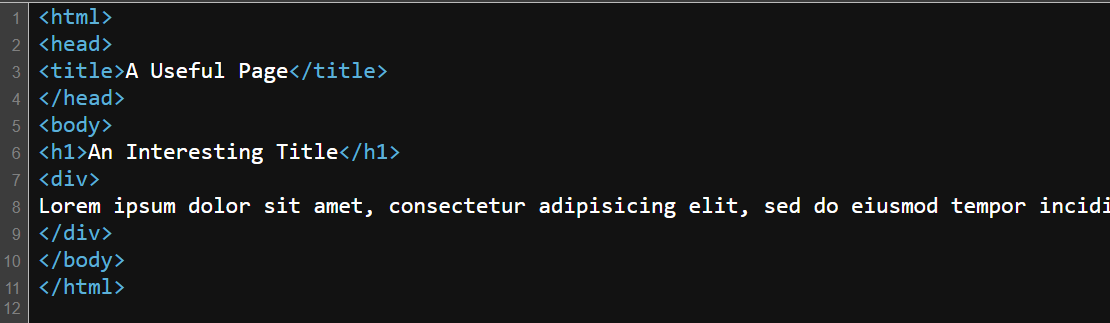

Basicamente o acesso a web é o envio de arquivos html que precisam ser interpretados pelo navegador.

## A leitura de páginas da web via Python

In [ ]:
from urllib.request import urlopen

html = urlopen('http://pythonscraping.com/pages/page1.html')


In [ ]:
type(html)

http.client.HTTPResponse

In [ ]:
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


Este comando gera o código HTML completo para page1 localizado na URL http:// pythonscraping.com/pages/page1.html. 

Mais precisamente, isso gera o arquivo HTML page1.html, encontrado no diretório <web root>/pages, no servidor localizado no nome de domínio http://pythonscraping.com.

urllib é uma biblioteca padrão do Python (o que significa que você não precisa instalar nada extra para executar este exemplo) e contém funções para solicitar dados na Web, manipular cookies e até alterar metadados, como cabeçalhos e seu agente de usuário. 

Usaremos urllib então recomendo que você leia a documentação do Python para a biblioteca.

https://docs.python.org/3/library/urllib.html

##Usando beatifulsoup

Como a biblioteca BeautifulSoup não é uma biblioteca padrão do Python, ela deve ser instalada. O Colab usa um servidor que já tem o BeatifulSoup instalado.

O objeto mais comumente usado na biblioteca BeautifulSoup é, apropriadamente, o objeto BeautifulSoup.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page1.html')
bs = BeautifulSoup(html.read(), 'html.parser')


In [ ]:
type(bs)

bs4.BeautifulSoup

In [ ]:
print(bs.h1)

<h1>An Interesting Title</h1>


In [ ]:
print(bs.h1.text)

An Interesting Title


Observe que isso retorna apenas a primeira instância da tag h1 encontrada na página.

html.parser é um analisador que está incluído no Python 3 e não requer instalações extras para ser usado. Geralmente usaremos este analisador

In [ ]:
bs

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>

In [ ]:
bs.title

<title>A Useful Page</title>

## Conectando de forma confiável e tratando de exceções

A web é bagunçada. Os dados estão mal formatados, os sites ficam inativos e as tags de fechamento desaparecem. 

Uma das experiências mais frustrantes no web scraping é dormir com um scraper em execução, sonhando com todos os dados que você terá em seu banco de dados no dia seguinte - apenas para descobrir que o scraper atingiu um erro em algum formato de dados inesperado e parou a execução logo depois que você parou de olhar para a tela.

Duas coisas principais podem dar errado:
* A página não foi encontrada no servidor (ou ocorreu um erro ao recuperá-la).
* O servidor não foi encontrado.

Na primeira situação, um erro HTTP será retornado. Esse erro HTTP pode ser “404 página não encontrada”, “500 erro interno do servidor” e assim por diante. Em todos esses casos, a função urlopen lançará a exceção genérica HTTPError.

Se o servidor não for encontrado, urlopen lançará um URLError.

In [ ]:
html = urlopen("https://pythonscrapingthisurldoesnotexist.com")

URLError: ignored

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

try:
    html = urlopen("https://pythonscrapingthisurldoesnotexist.com")
except HTTPError as e:
    print("The server returned an HTTP error")
except URLError as e:
    print("The server could not be found!")
else:
    print(html.read())

The server could not be found!
b''


Obviamente, se a página for recuperada com sucesso do servidor, ainda haverá o problema do conteúdo da página não ser exatamente o que você esperava.

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup


def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "lxml")
        title = bsObj.body.h8 #tag não existente
    except AttributeError as e:
        return None
    return title


title = getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)

Title could not be found


In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup


def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "lxml")
        title = bsObj.body.h1
    except AttributeError as e:
        return None
    return title


title = getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)

<h1>An Interesting Title</h1>


In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup


def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "html.parser")
        title = bsObj.body.h1
    except AttributeError as e:
        return None
    return title


title = getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)

<h1>An Interesting Title</h1>


## Atividade

Colete e exiba o texto do título do site https://pt.wikipedia.org/wiki/Final_da_Copa_S%C3%A3o_Paulo_de_Futebol_J%C3%BAnior_de_2022

# Cap 2 - Análise HTML avançada

Digamos que você tenha algum conteúdo aloo. Talvez seja um nome, estatística ou bloco de texto.

Talvez ele esteja enterrado 20 tags profundamente em um mingau de HTML sem tags úteis ou atributos HTML para serem encontrados. Digamos que você decida jogar a cautela ao vento e escreva algo como a seguinte linha para tentar a extração:

`bs.find_all('table')[4].find_all('tr')[2].find('td').find_all('div')[1].find('a')`

Isso não parece tão bom. 

Além da estética da linha, mesmo a menor alteração no site por um administrador do site pode quebrar completamente o seu web scraper.

## find() e find_all() com BeautifulSoup

https://www.pythonscraping.com/pages/warandpeace.html


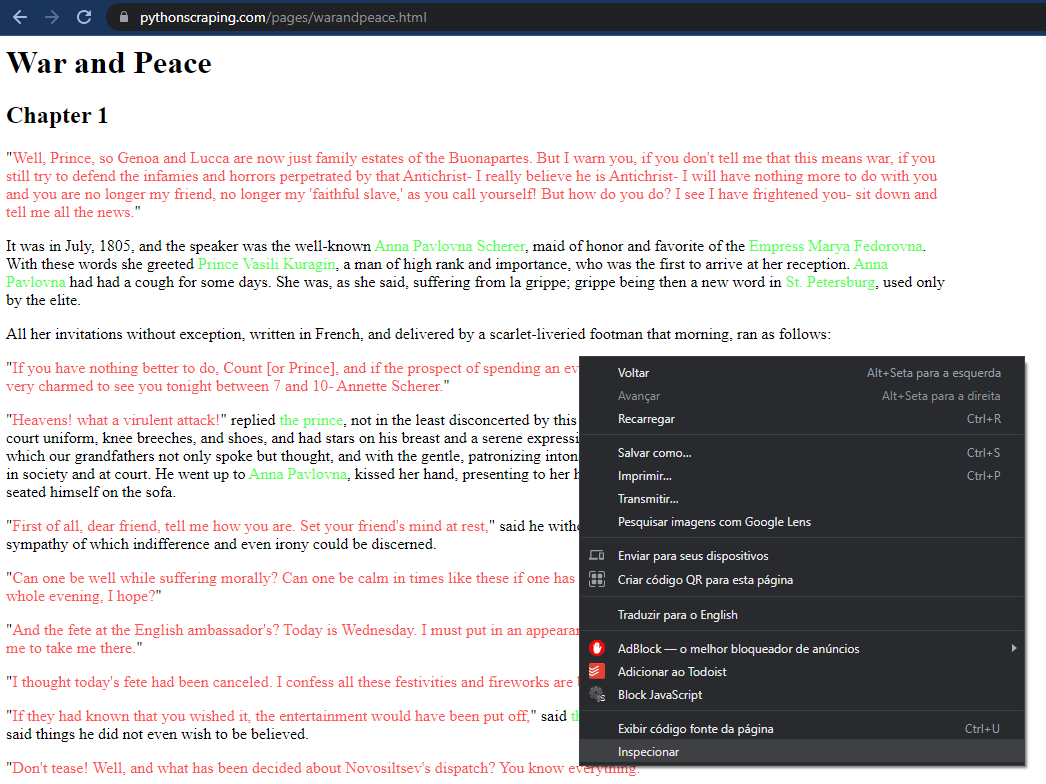

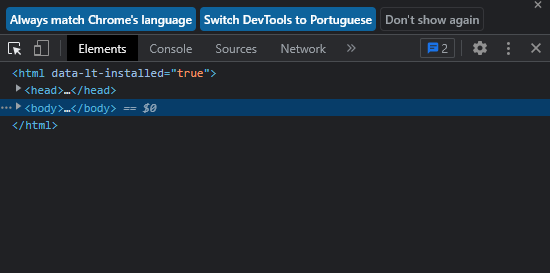

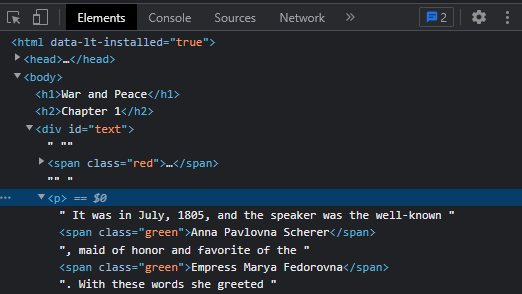

Find() e find_all() do BeautifulSoup são as duas funções que você provavelmente mais usará. Com eles, você pode facilmente filtrar páginas HTML para encontrar listas de tags desejadas, ou uma única tag, com base em seus vários atributos.

* find_all(tag, attributes, recursive, text, limit, keywords)
* find(tag, attributes, recursive, text, keywords)

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html, "html.parser")

In [ ]:
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print([title for title in titles])

[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]


O argumento attributes usa um dicionário Python de atributos e corresponde a tags que contêm qualquer um desses atributos.

In [ ]:
nameList = bs.findAll('span', {'class': 'green'})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [ ]:
allText = bs.find_all('span', {'class':{'green', 'red'}})
print([element for element in allText])

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>, <span class="green">Anna Pavlovna</span>, <span class="green">St. Petersburg</span>, <span class="red">If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.</span>, <span class="red">Heavens! w

In [ ]:
allText = bs.find_all('span')
print([element for element in allText])

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>, <span class="green">Anna Pavlovna</span>, <span class="green">St. Petersburg</span>, <span class="red">If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.</span>, <span class="red">Heavens! w

O argumento text é incomum, pois corresponde com base no conteúdo de texto das tags, em vez das propriedades das próprias tags.

In [ ]:
nameList = bs.find_all(text='the prince')
print(len(nameList))

7


In [ ]:
nameList

['the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince']

O argumento de palavra-chave permite selecionar tags que contêm um atributo específico ou conjunto de atributos.

In [ ]:
title = bs.find_all(id='title', class_='text')
print(title)

[]


como o id idealmente não pode ter duplicata, o código a seguir é a mesma coisa

In [ ]:
title = bs.find_all(id='title')
print(title)

[]


In [ ]:
text = bs.find_all(id='text')
print(text)

[<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the first to arrive at her
reception. <span class="green">Anna Pavlovna</span> had had a cough for some days. She was, as
she said, suffering from la grippe; grippe b

## Atividade

Colete e exiba o elemento html com a manchete principal do site https://www.tecmundo.com.br/


### Resposta

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://www.tecmundo.com.br/')
bs = BeautifulSoup(html, "html.parser")

element = bs.find(class_='tec--carousel__item__title__link')
print(element.text)

 WhatsApp lança opção de esconder status online e usuários comemoram 


## Navegando estruturas (arvores)

A função find_all é responsável por localizar tags com base em seus nomes e atributos. Mas e se você precisar encontrar uma tag com base em sua localização em um documento?

http://www.pythonscraping.com/pages/page3.html

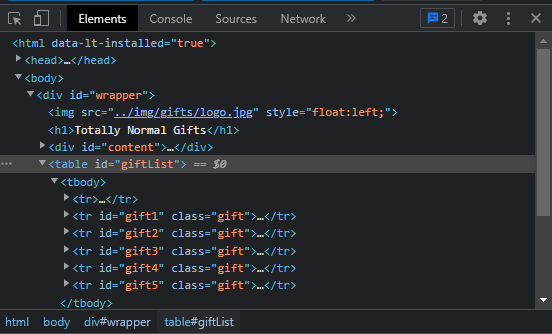

Se você quiser encontrar apenas descendentes que sejam filhos, você pode usar a tag .children:

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

for child in bs.find('table',{'id':'giftList'}).children: #filhos da tag table
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


Esse código imprime a lista de linhas de produtos na tabela giftList, incluindo a linha inicial de rótulos de coluna. 

Se você escrevesse usando a função descendentes() em vez da função children(), cerca de duas dúzias de tags seriam encontradas na tabela e impressas, incluindo tags img, tags span e tags td individuais.

### Lidando com irmãos

A função BeautifulSoup next_siblings() torna trivial coletar dados de tabelas, especialmente aquelas com linhas de título:

In [ ]:
for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings: # o id está ai para o caso de haver mais de uma tabela
    print(sibling) 



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

A saída desse código é imprimir todas as linhas de produtos da tabela de produtos, exceto a primeira linha de título.

### Lidar com os pais

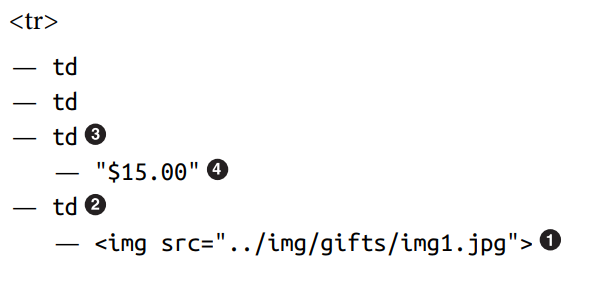

In [ ]:
print(bs.find('img',
              {'src':'../img/gifts/img1.jpg'})
      .parent.previous_sibling.get_text())


$15.00



## Atividade

No site https://www.pythonscraping.com/pages/page3.html

Pegar e exibir os textos da descrição dos presentes

### Resposta

In [ ]:
for element in bs.find_all('span', {'class':'excitingNote'}): # o id está ai para o caso de haver mais de uma tabela
    print(element.parent.get_text()) 


This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!


Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!


If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!


This is an ex-parrot! Or maybe he's only resting?


If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!



## Regular Expressions

In [ ]:
images = bs.find_all('img')
for image in images: 
    print(image['src'])

../img/gifts/logo.jpg
../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


Observe que o site possui muitas imagens de produtos, que têm o seguinte formato:

`<img src="../img/gifts/img3.jpg">`

Se quisermos as imagens dos presentes, mas tentarmos pegar todas as imagens podem vir várias outras que não no interessam.

A solução é procurar algo de identificação sobre a própria tag. Nesse caso, você pode ver o caminho do arquivo das imagens do produto:

In [ ]:
import re

images = bs.find_all('img', {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})
for image in images: 
    print(image)

<img src="../img/gifts/img1.jpg"/>
<img src="../img/gifts/img2.jpg"/>
<img src="../img/gifts/img3.jpg"/>
<img src="../img/gifts/img4.jpg"/>
<img src="../img/gifts/img6.jpg"/>


In [ ]:
import re

images = bs.find_all('img', {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})
for image in images: 
    print(image['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


## Acessando atributos

Muitas vezes na web scraping você não está procurando o conteúdo de uma tag; você está procurando por seus atributos. 

Isso se torna especialmente útil para tags como a, onde o URL para o qual está apontando está contido no atributo href; ou a tag img, onde a imagem de destino está contida no atributo src.

In [ ]:
import re

elements = bs.find_all('img')
for element in elements: 
    print(element.attrs)

{'src': '../img/gifts/logo.jpg', 'style': 'float:left;'}
{'src': '../img/gifts/img1.jpg'}
{'src': '../img/gifts/img2.jpg'}
{'src': '../img/gifts/img3.jpg'}
{'src': '../img/gifts/img4.jpg'}
{'src': '../img/gifts/img6.jpg'}


In [ ]:
bs.find_all()

[<html>
 <head>
 <style>
 img{
 	width:75px;
 }
 table{
 	width:50%;
 }
 td{
 	margin:10px;
 	padding:10px;
 }
 .wrapper{
 	width:800px;
 }
 .excitingNote{
 	font-style:italic;
 	font-weight:bold;
 }
 </style>
 </head>
 <body>
 <div id="wrapper">
 <img src="../img/gifts/logo.jpg" style="float:left;"/>
 <h1>Totally Normal Gifts</h1>
 <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
 hand-curated by well-paid, free-range Tibetan monks.<p>
 We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
 123 Main St.<br/>
 Abuja, Nigeria
 We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
 <table id="giftList">
 <tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift f

O código a seguir encontrará tags com dois atributos

In [ ]:
bs.find_all(lambda tag: len(tag.attrs) == 2)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td>

 # Cap 3 - web crawlers

Nesta seção, vamos iniciar um projeto que se tornará um localizador de soluções Six Degrees of Wikipedia: você poderá pegar a página Eric Idle e encontrar o menor número de cliques em links que o levarão ao Kevin Bacon página.

http://en.wikipedia.org/wiki/Kevin_Bacon

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup 

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Wikipedia:Protection_policy#semi
#mw-head
#searchInput
/wiki/Kevin_Bacon_(disambiguation)
/wiki/File:Kevin_Bacon_SDCC_2014.jpg
/wiki/Philadelphia,_Pennsylvania
/wiki/Kevin_Bacon_filmography
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
#cite_note-1
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Wikipedia:Citation_needed
http://baconbros.com/
#cite_note-2
#cite_note-actor-3
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/X-Men:_First_Class
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chan

Se você observar a lista de links produzidos, notará que todos os artigos que você espera estão lá: “Apollo 13”, “Philadelphia”, “Primetime Emmy Award” e assim por diante. No entanto, há algumas coisas que você não quer também:

* //wikimediafoundation.org/wiki/Privacy_policy
* //en.wikipedia.org/wiki/Wikipedia:Contact_us

Na verdade, a Wikipedia está cheia de links de barra lateral, rodapé e cabeçalho que aparecem em todas as páginas, juntamente com links para as páginas de categoria, páginas de discussão e outras páginas que não contêm artigos diferentes:

Encontrar padrões entre “links de artigos” e “outros links”.

Se examinar os links que apontam para as páginas do artigo (ao contrário de outras páginas internas), verá que todos eles têm três coisas em comum:
* Eles residem dentro do div com o id definido como bodyContent.
* Os URLs não contêm dois pontos.
* Os URLs começam com /wiki/.

In [ ]:
from urllib.request import urlopen 
from bs4 import BeautifulSoup 
import re

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find('div', {'id':'bodyContent'}).find_all(
    'a', href=re.compile('^(/wiki/)((?!:).)*$')):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia,_Pennsylvania
/wiki/Kevin_Bacon_filmography
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/Streaming_television
/wiki/I_Love_Dick_(TV_series)
/wiki/Golden_Globe_Award_for_Best_Actor_%E2%80%93_Television_Series_Musical_or

Se você executar isso, deverá ver uma lista de todos os URLs de artigos aos quais o artigo da Wikipedia sobre Kevin Bacon está vinculado.

## Caminhada aleatória (Random Walk)

É claro que ter um script que encontre todos os links de artigos em um artigo codificado da Wikipédia, embora interessante, é bastante inútil na prática. Você precisa ser capaz de pegar esse código e transformá-lo em algo mais parecido com o seguinte:
* Uma única função, getLinks, que recebe um URL de artigo da Wikipedia no formato /wiki/ e retorna uma lista de todos os URLs de artigos vinculados no mesmo formato.
* Uma função principal que chama getLinks com um artigo inicial, escolhe um link de artigo aleatório da lista retornada e chama getLinks novamente, até que você pare o programa ou até que nenhum link de artigo seja encontrado na nova página.

O código abaixo faz isso. CUIDADO! Esse código é praticamente um loop infinito.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html = urlopen('http://en.wikipedia.org{}'.format(articleUrl))
    bs = BeautifulSoup(html, 'html.parser')
    return bs.find('div', {'id':'bodyContent'}).find_all('a', href=re.compile('^(/wiki/)((?!:).)*$'))

links = getLinks('/wiki/Kevin_Bacon')
while len(links) > 0:
    newArticle = links[random.randint(0, len(links)-1)].attrs['href']
    print(newArticle)
    links = getLinks(newArticle)

/wiki/Boston_Society_of_Film_Critics
/wiki/The_Father_(2020_film)
/wiki/The_Broken_Circle_Breakdown
/wiki/Mother_of_Mine_(film)
/wiki/The_Sea_Inside
/wiki/The_New_Land
/wiki/Sierra_Nevada
/wiki/Tuolumne_River
/wiki/United_States_Geological_Survey
/wiki/United_States_Army_CCDC_Armaments_Center
/wiki/Laser
/wiki/Amplified_spontaneous_emission
/wiki/Laser_linewidth
/wiki/Doi_(identifier)
/wiki/International_Standard_Audiovisual_Number
/wiki/ISO_10161
/wiki/JPEG_XR
/wiki/ANSI_C
/wiki/COLLADA
/wiki/OSI_model
/wiki/ISO_22395
/wiki/Versatile_Video_Coding
/wiki/JPEG_XS
/wiki/Scalable_Vector_Graphics
/wiki/Speech_Synthesis_Markup_Language
/wiki/Franklin_Seaney_Cooper
/wiki/Speech_synthesis
/wiki/Terminology_extraction
/wiki/Neural_machine_translation
/wiki/Differentiable_function
/wiki/LaMDA
/wiki/YouTube_Theater
/wiki/Dodgeball_(service)
/wiki/AppJet
/wiki/WMLScript
/wiki/Nashorn_(JavaScript_engine)
/wiki/JavaScript_library
/wiki/JavaScript_engine
/wiki/Telerik
/wiki/Progress_Software
/wiki/Na

KeyboardInterrupt: ignored

A primeira coisa que o programa faz, depois de importar as bibliotecas necessárias, é definir a semente do gerador de números aleatórios com a hora atual do sistema. Isso praticamente garante um caminho aleatório novo e interessante pelos artigos da Wikipedia toda vez que o programa é executado.

Claro, há um pouco mais para resolver um problema de Seis Graus da Wikipédia do que construir um raspador que vá de página em página. Você também deve ser capaz de armazenar e analisar os dados resultantes. 

### Um aviso sobre recursão

Este é um aviso raramente visto em livros de software, mas achei que você deveria estar ciente: se ficar rodando por tempo suficiente, o programa anterior quase certamente irá travar. Python tem um limite de recursão padrão (o número de vezes que um programa pode chamar a si mesmo recursivamente) de 1.000.

## Rastreando um site inteiro

O rastreamento de um site inteiro, especialmente um grande, é um processo que consome muita memória e é mais adequado para aplicativos para os quais um banco de dados para armazenar resultados de rastreamento está prontamente disponível.

No entanto, você pode explorar o comportamento desses tipos de aplicativos sem executá-los em grande escala.

Para evitar o rastreamento da mesma página duas vezes, é extremamente importante que todos os links internos descobertos sejam formatados de forma consistente e mantidos em um conjunto em execução para facilitar as pesquisas, enquanto o programa está em execução.

Um conjunto é semelhante a uma lista, mas os elementos não possuem uma ordem específica, e apenas elementos únicos serão armazenados, o que é ideal para nossas necessidades. Somente links “novos” devem ser rastreados e pesquisados por links adicionais:

Para mostrar a você o efeito completo de como esse negócio de rastreamento na web funciona, relaxei os padrões do que constitui um link interno (dos exemplos anteriores). Em vez de limitar o scraper às páginas do artigo, ele procura todos os links que começam com /wiki/, independentemente de onde estejam na página e de conterem dois-pontos.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages = set()
def getLinks(pageUrl):
    global pages
    html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
    bs = BeautifulSoup(html, 'html.parser')
    for link in bs.find_all('a', href=re.compile('^(/wiki/)')):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                #We have encountered a new page
                newPage = link.attrs['href']
                print(newPage)
                pages.add(newPage)
                getLinks(newPage)
getLinks('')

/wiki/Wikipedia
/wiki/Wikipedia:Protection_policy#extended
/wiki/Wikipedia:Protection_policy#semi
/wiki/Wikipedia:Requests_for_page_protection
/wiki/Wikipedia:Requests_for_page_protection/Administrator_instructions
/wiki/Wikipedia:Protection_policy
/wiki/Wikipedia:Lists_of_protected_pages
/wiki/Wikipedia:Protection_policy#Semi-protection
/wiki/Wikipedia:Perennial_proposals
/wiki/Wikipedia:Reliable_sources/Perennial_sources
/wiki/Wikipedia:Reliable_sources
/wiki/Wikipedia:WikiProject_Reliability
/wiki/Wikipedia:WRE
/wiki/File:People_icon.svg
/wiki/Special:WhatLinksHere/File:People_icon.svg
/wiki/Help:What_links_here
/wiki/Wikipedia:Project_namespace#How-to_and_information_pages
/wiki/Wikipedia:Policies_and_guidelines
/wiki/Wikipedia:WikiProject_Politics
/wiki/Wikipedia:WikiProject_Poland
/wiki/Wikipedia:Protection_policy#pending
/wiki/Wikipedia:WikiProject_Parliamentary_Procedure
/wiki/User:Emb021
/wiki/File:Flag_of_the_United_States.svg
/wiki/Scalable_Vector_Graphics
/wiki/SVG_(disambi

KeyboardInterrupt: ignored

## Atividade

Exiba a quantidade de links internos da página http://en.wikipedia.org, e exiba a quantidade de links internos de cada link da página principal.

### Resposta

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages = set()
def getLinks(pageUrl):
    global pages
    #html=urlopen(pageUrl)
    html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
    bs = BeautifulSoup(html, 'html.parser')
    for link in bs.find_all('a', href=re.compile('^(/wiki/)')):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                #We have encountered a new page
                newPage = link.attrs['href']
                #print(newPage)
                pages.add(newPage)
                #getLinks(newPage)

def conteLinks(pageUrl):
    contador=0
    #html=urlopen(pageUrl)
    html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
    bs = BeautifulSoup(html, 'html.parser')
    for link in bs.find_all('a', href=re.compile('^(/wiki/)')):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                contador=contador+1
    return contador

getLinks('')

print('Quantidade de links na página principal: ',len(pages))

for link in pages.copy():
  print(f'Quantidade de links da página {link}: {conteLinks(link)}')

Quantidade de links na página principal:  148
Quantidade de links da página /wiki/Air_India: 1023
Quantidade de links da página /wiki/Materiel: 249
Quantidade de links da página /wiki/1954: 2304
Quantidade de links da página /wiki/Central_America: 2570
Quantidade de links da página /wiki/Help:Your_first_article: 379
Quantidade de links da página /wiki/2022_Russian_invasion_of_Ukraine: 2867
Quantidade de links da página /wiki/Gauls: 1235
Quantidade de links da página /wiki/Habitat_destruction: 683
Quantidade de links da página /wiki/Dancing_House: 148
Quantidade de links da página /wiki/English_language: 2024
Quantidade de links da página /wiki/Habitat: 893
Quantidade de links da página /wiki/October_16: 1245
Quantidade de links da página /wiki/Carolyn_Bertozzi: 558
Quantidade de links da página /wiki/Ottoman_wars_in_Europe: 991
Quantidade de links da página /wiki/Hurricane_Julia_(2022): 178
Quantidade de links da página /wiki/Wikipedia:About_Today%27s_featured_article: 20
Quantidade de

## Rastejando pela Internet

In [ ]:
from urllib.request import urlopen
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import re
import datetime
import random

pages = set()
random.seed(datetime.datetime.now())

#Retrieves a list of all Internal links found on a page
def getInternalLinks(bs, includeUrl):
    includeUrl = '{}://{}'.format(urlparse(includeUrl).scheme, urlparse(includeUrl).netloc)
    internalLinks = []
    #Finds all links that begin with a "/"
    for link in bs.find_all('a', href=re.compile('^(/|.*'+includeUrl+')')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in internalLinks:
                if(link.attrs['href'].startswith('/')):
                    internalLinks.append(includeUrl+link.attrs['href'])
                else:
                    internalLinks.append(link.attrs['href'])
    return internalLinks
            
#Retrieves a list of all external links found on a page
def getExternalLinks(bs, excludeUrl):
    externalLinks = []
    #Finds all links that start with "http" that do
    #not contain the current URL
    for link in bs.find_all('a', href=re.compile('^(http|www)((?!'+excludeUrl+').)*$')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in externalLinks:
                externalLinks.append(link.attrs['href'])
    return externalLinks

def getRandomExternalLink(startingPage):
    html = urlopen(startingPage)
    bs = BeautifulSoup(html, 'html.parser')
    externalLinks = getExternalLinks(bs, urlparse(startingPage).netloc)
    if len(externalLinks) == 0:
        print('No external links, looking around the site for one')
        domain = '{}://{}'.format(urlparse(startingPage).scheme, urlparse(startingPage).netloc)
        internalLinks = getInternalLinks(bs, domain)
        return getRandomExternalLink(internalLinks[random.randint(0,
                                    len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0, len(externalLinks)-1)]
    
def followExternalOnly(startingSite):
    externalLink = getRandomExternalLink(startingSite)
    print('Random external link is: {}'.format(externalLink))
    followExternalOnly(externalLink)
            
followExternalOnly('http://oreilly.com')

Random external link is: https://oreilly.id/
Random external link is: https://www.oreilly.com/privacy.html?donotsell=show
Random external link is: https://oreillylearning.in/
Random external link is: https://www.oreilly.com/emails/newsletters/
Random external link is: https://itunes.apple.com/us/app/safari-to-go/id881697395
Random external link is: https://apps.apple.com/us/app/datacamp-learn-data-science/id1263413087
Random external link is: https://www.apple.com/iphone/
Random external link is: https://support.apple.com/en-us/HT202716
Random external link is: https://www.apple.com/us/shop/goto/store
Random external link is: https://www.icloud.com


KeyboardInterrupt: ignored